# Análisis de series temporales
En este notebook se analiza la evolución en el tiempo de los distintos incidentes del dataset, en función de distintas características, tales como el número de incidentes o el número de personas involucradas.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Cargamos el dataset de incidentes preprocesado. Como estamos realizando un análisis de series temporales, usamos la columna "date" como index y eliminamos la columna unnamed: 0

In [3]:
df = pd.read_csv('gun_violence_dataset/incidents_dataset.csv', parse_dates=['date'], dayfirst=False, index_col='date')
df = df.drop(labels=['Unnamed: 0'], axis=1)

In [4]:
df.head()

,incident_id,state,city_or_county,address,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,notes,average_age,n_victims,n_suspects,stolen_gun_involved,minors_involved,women_percentage,domestic violence,drive-by,gang involvement,home invasion,institution/group/business,shooting,murder,officer involved,possession,shot,suicide,drug involvement,stolen/illegally owned gun,bar/club incident,sex crime,school incident,kidnapping/abductions/hostage,defensive use,car-jacking,armed robbery,hate crime,child,accidental/negligent discharge,brandishing/flourishing/open carry/lost/found,gun(s) stolen,guns stolen,road rage,under the influence of alcohol or drugs,bb/pellet/replica gun,cleaning gun,implied weapon,house party,atf/le confiscation/raid/arrest,gun at school,thought gun was unloaded,hunting accident,stolen gun,police targeted,pistol-whipping,playing with gun,shootout,unlawful purchase/sale,non-aggression,gun shop robbery or burglary,concealed carry license,assault weapon,lockdown/alert,tsa action,terrorism,ghost gun,political violence,mistaken id,nav,gun buy back action
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,461105,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,40.3467,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,20.00,4.0,1.0,Unknown,False,25.0,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-01,460726,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,33.9090,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,20.00,4.0,1.0,Unknown,False,0.0,False,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-01,478855,Ohio,Lorain,1776 East 28th Street,1,3,9.0,41.4455,-82.1377,2.0,NaN,31.20,3.0,2.0,Unknown,False,0.0,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-05,478925,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,39.6518,-104.8020,NaN,NaN,37.75,3.0,1.0,Unknown,False,25.0,False,False,False,False,False,True,True,True,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-07,478959,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,36.1140,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,31.25,3.0,1.0,Unknown,True,50.0,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.incident_id.resample('Y').count()

date
2013-12-31      276
2014-12-31    51696
2015-12-31    53148
2016-12-31    54532
2017-12-31    59881
2018-12-31    12221
Freq: A-DEC, Name: incident_id, dtype: int64

# Por número de incidentes

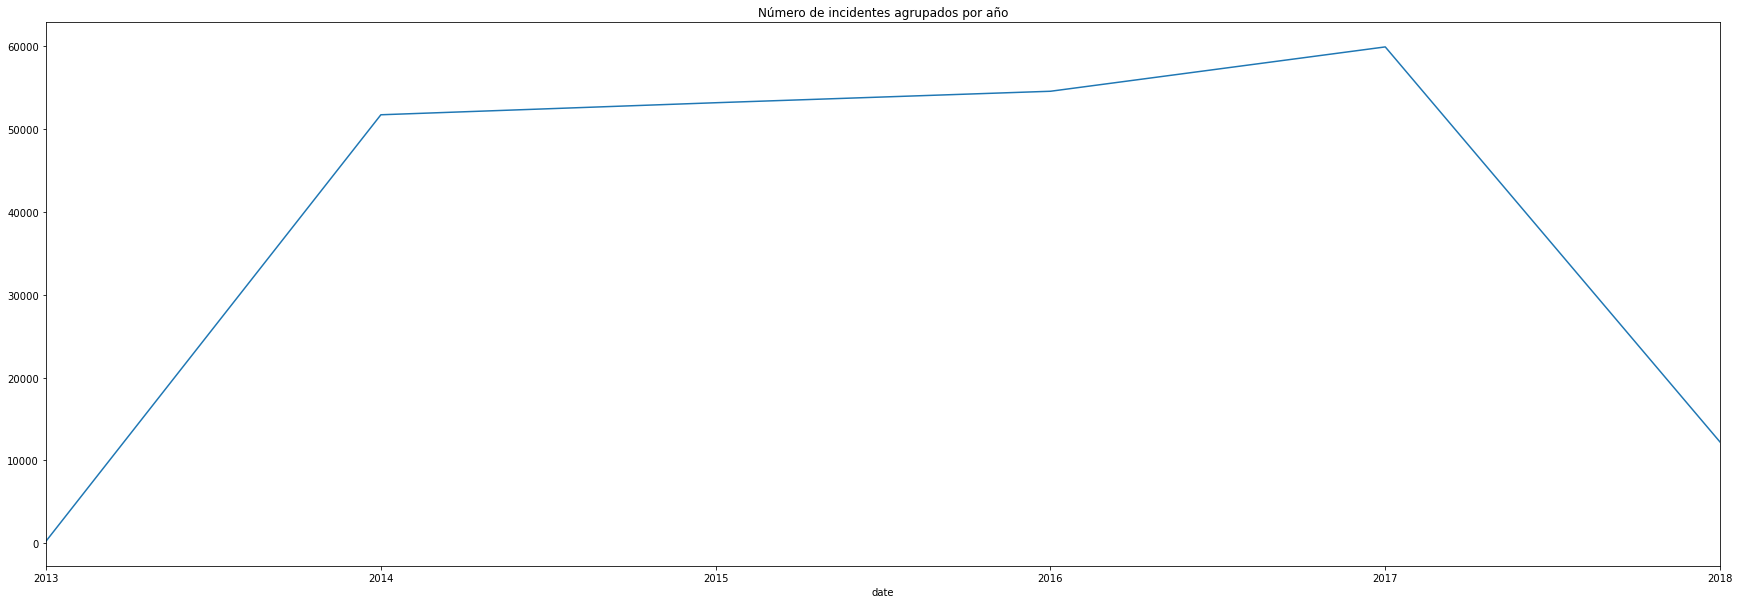

In [6]:
plt.figure(figsize=(30,10))
df.incident_id.resample('Y').count().plot(title="Número de incidentes agrupados por año")
plt.show()

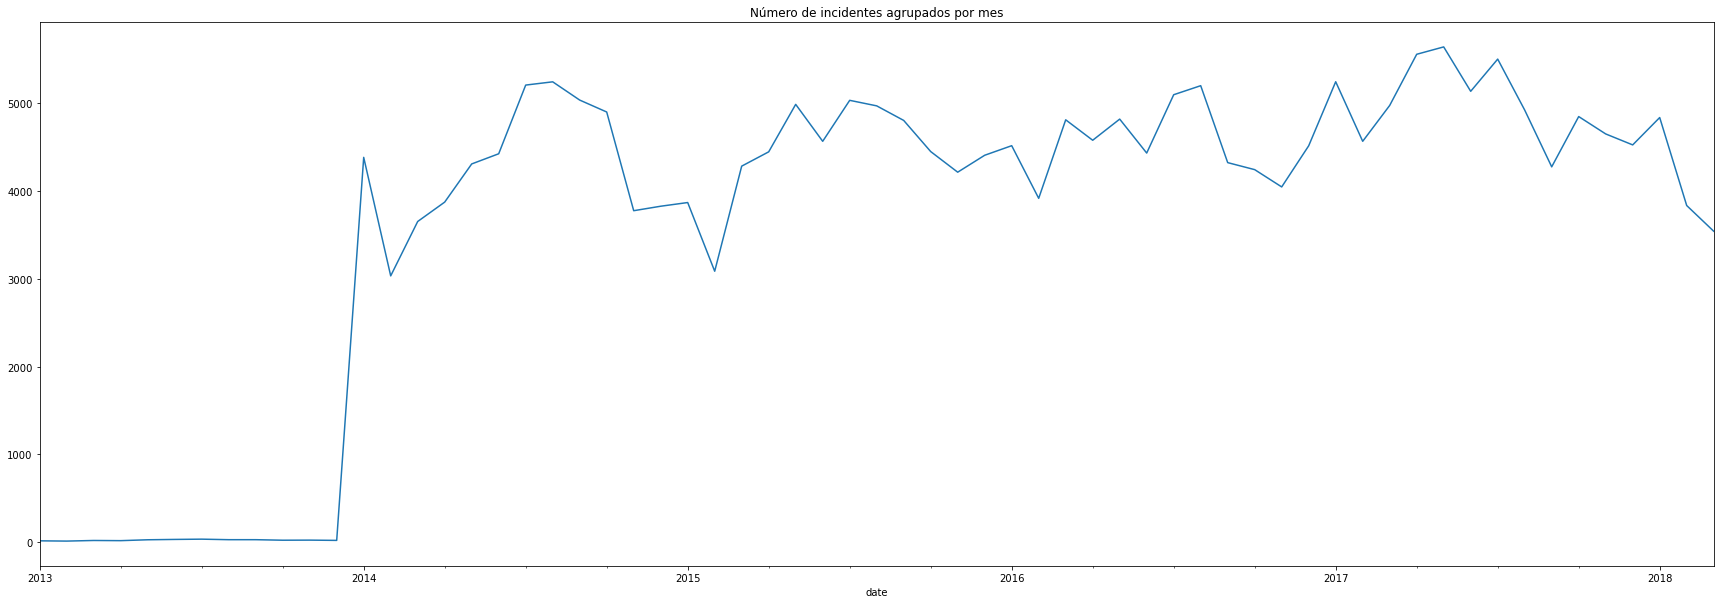

In [7]:
# Agrupamos por mes e imprimimos
plt.figure(figsize=(30,10))
df.incident_id.resample('M').count().plot(title="Número de incidentes agrupados por mes")
plt.show()

Analizamos el componente estacional

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# Seasonal decomposition
seasonal_decomposition = seasonal_decompose(df.incident_id.resample('M').count(), model='multiplicative', period=12)

<AxesSubplot:xlabel='date'>

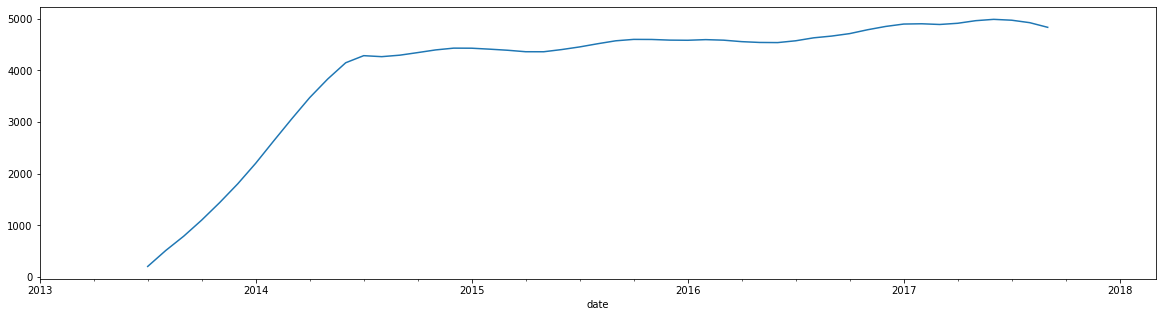

In [10]:
# Trend
trend = seasonal_decomposition.trend
plt.figure(figsize=(20,5))
trend.plot()

<AxesSubplot:xlabel='date'>

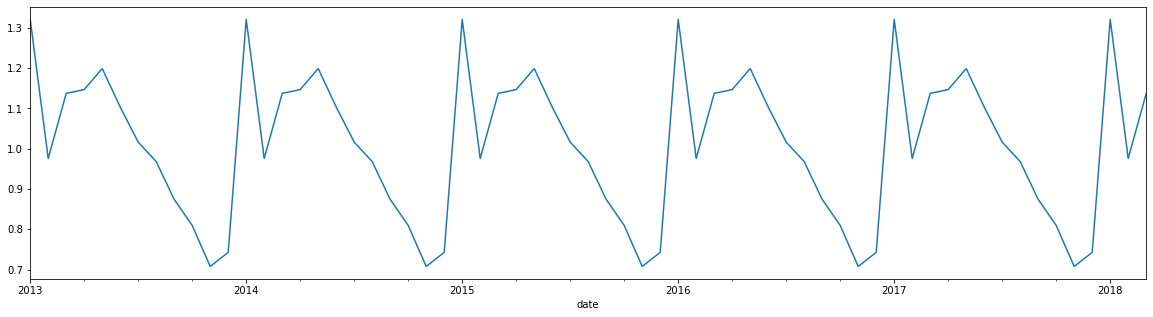

In [11]:
# Seasonality
seasonality = seasonal_decomposition.seasonal
plt.figure(figsize=(20, 5))
seasonality.plot()

# Número de víctimas, sospechosos, heridos y asesinados por mes

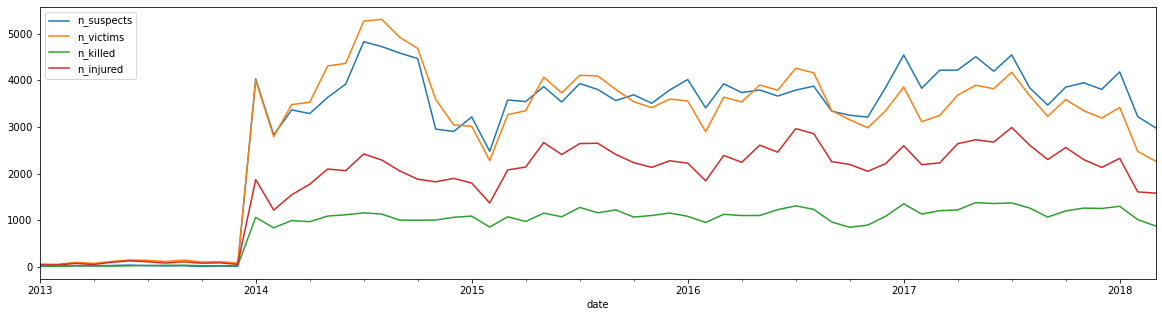

In [12]:
suspects_per_month = df.n_suspects.resample('M').sum()
victims_per_month = df.n_victims.resample('M').sum()
killed_per_month = df.n_killed.resample('M').sum()
injured_per_month = df.n_injured.resample('M').sum()


plt.figure(figsize=(20,5))
suspects_per_month.plot()
victims_per_month.plot()
killed_per_month.plot()
injured_per_month.plot()
plt.legend()
plt.show()

# Creamos un diagrama interactivo del número de incidentes por estado

In [13]:
import plotly.io as pio
import plotly.graph_objects as go

In [14]:
df.head()

,incident_id,state,city_or_county,address,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,notes,average_age,n_victims,n_suspects,stolen_gun_involved,minors_involved,women_percentage,domestic violence,drive-by,gang involvement,home invasion,institution/group/business,shooting,murder,officer involved,possession,shot,suicide,drug involvement,stolen/illegally owned gun,bar/club incident,sex crime,school incident,kidnapping/abductions/hostage,defensive use,car-jacking,armed robbery,hate crime,child,accidental/negligent discharge,brandishing/flourishing/open carry/lost/found,gun(s) stolen,guns stolen,road rage,under the influence of alcohol or drugs,bb/pellet/replica gun,cleaning gun,implied weapon,house party,atf/le confiscation/raid/arrest,gun at school,thought gun was unloaded,hunting accident,stolen gun,police targeted,pistol-whipping,playing with gun,shootout,unlawful purchase/sale,non-aggression,gun shop robbery or burglary,concealed carry license,assault weapon,lockdown/alert,tsa action,terrorism,ghost gun,political violence,mistaken id,nav,gun buy back action
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,461105,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,40.3467,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,20.00,4.0,1.0,Unknown,False,25.0,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-01,460726,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,33.9090,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,20.00,4.0,1.0,Unknown,False,0.0,False,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-01,478855,Ohio,Lorain,1776 East 28th Street,1,3,9.0,41.4455,-82.1377,2.0,NaN,31.20,3.0,2.0,Unknown,False,0.0,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-05,478925,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,39.6518,-104.8020,NaN,NaN,37.75,3.0,1.0,Unknown,False,25.0,False,False,False,False,False,True,True,True,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-07,478959,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,36.1140,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,31.25,3.0,1.0,Unknown,True,50.0,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.index[df['state']=='Hawaii']

DatetimeIndex(['2014-01-01', '2014-01-12', '2014-01-23', '2014-01-28', '2014-01-29', '2014-03-12', '2014-03-16', '2014-03-16', '2014-03-27', '2014-03-28',
               ...
               '2018-01-15', '2018-01-17', '2018-01-22', '2018-01-28', '2018-02-02', '2018-02-09', '2018-02-09', '2018-02-11', '2018-03-05', '2018-03-18'], dtype='datetime64[ns]', name='date', length=277, freq=None)

In [46]:
df.head(n=50)

,incident_id,state,city_or_county,address,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,notes,average_age,n_victims,n_suspects,stolen_gun_involved,minors_involved,women_percentage,domestic violence,drive-by,gang involvement,home invasion,institution/group/business,shooting,murder,officer involved,possession,shot,suicide,drug involvement,stolen/illegally owned gun,bar/club incident,sex crime,school incident,kidnapping/abductions/hostage,defensive use,car-jacking,armed robbery,hate crime,child,accidental/negligent discharge,brandishing/flourishing/open carry/lost/found,gun(s) stolen,guns stolen,road rage,under the influence of alcohol or drugs,bb/pellet/replica gun,cleaning gun,implied weapon,house party,atf/le confiscation/raid/arrest,gun at school,thought gun was unloaded,hunting accident,stolen gun,police targeted,pistol-whipping,playing with gun,shootout,unlawful purchase/sale,non-aggression,gun shop robbery or burglary,concealed carry license,assault weapon,lockdown/alert,tsa action,terrorism,ghost gun,political violence,mistaken id,nav,gun buy back action
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,461105,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,40.3467,-79.8559,NaN,Julian Sims under investigation: Four Shot and...,20.000000,4.0,1.0,Unknown,False,25.000000,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-01,460726,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,33.9090,-118.3330,NaN,Four Shot; One Killed; Unidentified shooter in...,20.000000,4.0,1.0,Unknown,False,0.000000,False,False,True,False,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-01,478855,Ohio,Lorain,1776 East 28th Street,1,3,9.0,41.4455,-82.1377,2.0,NaN,31.200000,3.0,2.0,Unknown,False,0.000000,False,False,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-05,478925,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,39.6518,-104.8020,NaN,NaN,37.750000,3.0,1.0,Unknown,False,25.000000,False,False,False,False,False,True,True,True,False,True,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-07,478959,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,36.1140,-79.9569,2.0,Two firearms recovered. (Attempted) murder sui...,31.250000,3.0,1.0,Unknown,True,50.000000,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2013-01-07,478948,Oklahoma,Tulsa,6000 block of South Owasso,4,0,1.0,36.2405,-95.9768,NaN,NaN,33.500000,4.0,2.0,Unknown,False,66.666667,False,False,False,True,False,True,True,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fal

In [52]:
buttons = []
i = 0



fig3 = go.Figure()
state_list = list(df['state'].unique())

for state in state_list:
    
    data = df['state']==state
    data.resample('M').sum()

    fig3.add_trace(
        go.Scatter(
            x = df.resample('M').count().index,
            y = data.resample('M').sum(),
#             y = df['n_killed'][df['state']==state].resample('M').sum(),
#             x = df.index[df['state']==state],
#             y = df['n_killed'][df['state']==state],
            name = state, visible = (i==0)
        )
    )
    
for state in state_list:
    args = [False] * len(state_list)
    args[i] = True
    
    #create a button object for the country we are on
    button = dict(label = state,
                  method = "update",
                  args=[{"visible": args}])
    
    #add the button to our list of buttons
    buttons.append(button)
    
    #i is an iterable used to tell our "args" list which value to set to True
    i+=1  
    
fig3.update_layout(updatemenus=[dict(active=0,
                                    type="dropdown",
                                    buttons=buttons,
                                    x = 0,
                                    y = 1.1,
                                    xanchor = 'left',
                                    yanchor = 'bottom'),
                              ])

fig3.update_layout(
    autosize=False,
    width=1000,
    height=800,)

# Número de muertes, heridos, sospechosos y víctimas por estado

In [60]:
df.columns

Index(['incident_id', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'congressional_district', 'latitude', 'longitude', 'n_guns_involved', 'notes', 'average_age', 'n_victims', 'n_suspects', 'stolen_gun_involved', 'minors_involved', 'women_percentage', 'domestic violence', 'drive-by', 'gang involvement', 'home invasion', 'institution/group/business', 'shooting', 'murder', 'officer involved', 'possession', 'shot', 'suicide', 'drug involvement', 'stolen/illegally owned gun', 'bar/club incident', 'sex crime', 'school incident', 'kidnapping/abductions/hostage', 'defensive use', 'car-jacking', 'armed robbery', 'hate crime', 'child', 'accidental/negligent discharge', 'brandishing/flourishing/open carry/lost/found', 'gun(s) stolen', 'guns stolen', 'road rage', 'under the influence of alcohol or drugs', 'bb/pellet/replica gun', 'cleaning gun', 'implied weapon', 'house party', 'atf/le confiscation/raid/arrest', 'gun at school', 'thought gun was unloaded', 'hunting accident',
    

In [72]:
fig4 = go.Figure()

state = 'California'

fig4.add_trace(
    go.Scatter(
        x = df.resample('M').count().index,
            y = df['n_killed'][df['state']==state].resample('M').sum(),
            name = 'n_killed in {}'.format(state), line=dict(color="#FF0000", dash='dash')
    )
)

fig4.add_trace(
    go.Scatter(
        x = df.resample('M').count().index,
            y = df['n_injured'][df['state']==state].resample('M').sum(),
            name = 'n_injured in {}'.format(state), line=dict(color="#0000FF", dash='dash')
    )
)

fig4.add_trace(
    go.Scatter(
        x = df.resample('M').count().index,
            y = df['n_victims'][df['state']==state].resample('M').sum(),
            name = 'n_victims in {}'.format(state), line=dict(color="#FF0000")
    )
)

fig4.add_trace(
    go.Scatter(
        x = df.resample('M').count().index,
            y = df['n_suspects'][df['state']==state].resample('M').sum(),
            name = 'n_suspects in {}'.format(state), line=dict(color="#0000FF")
    )
)

fig4.show()